In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss, Conv2d, Sequential, BatchNorm2d
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torchinfo import summary

from ActiveShiftLayer import ASL
from util import test_loss, train_NN

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cuda


In [3]:
batch_size = 100

#transform images into normalized tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=True,
    transform=transform,
)

test_dataset = datasets.MNIST(
    "./data/MNIST",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

In [4]:
from Models import LeNet

input_shape = (batch_size, 1, 28, 28)

LeNN = LeNet(input_shape, num_labels=10)

summary(LeNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─Conv2d: 2-5                       [100, 16, 14, 14]         2,416
│    └─BatchNorm2d: 2-6                  [100, 16, 14, 14]         32
│    └─Tanh: 2-7                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-8                    [100, 16, 7, 7]           --
│    └─Flatten: 2-9                      [100, 784]                --
│    └─Linear: 2-10                      [100, 120]                94,200
│    └─Tanh: 2-11                        [100, 120]                --
│    └─

In [5]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

In [6]:
leStats = train_NN(LeNN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.356
test_loss: 0.107, test_accuracy: 96.64
[1,   400] train_loss: 0.120
test_loss: 0.079, test_accuracy: 97.57
[1,   600] train_loss: 0.083
test_loss: 0.068, test_accuracy: 97.92
[2,   200] train_loss: 0.052
test_loss: 0.051, test_accuracy: 98.43
[2,   400] train_loss: 0.049
test_loss: 0.040, test_accuracy: 98.78
[2,   600] train_loss: 0.047
test_loss: 0.038, test_accuracy: 98.75
[3,   200] train_loss: 0.031
test_loss: 0.034, test_accuracy: 98.84
[3,   400] train_loss: 0.029
test_loss: 0.032, test_accuracy: 98.97
[3,   600] train_loss: 0.030
test_loss: 0.038, test_accuracy: 98.78
[4,   200] train_loss: 0.023
test_loss: 0.031, test_accuracy: 98.97
[4,   400] train_loss: 0.023
test_loss: 0.030, test_accuracy: 99.0
[4,   600] train_loss: 0.022
test_loss: 0.030, test_accuracy: 98.92


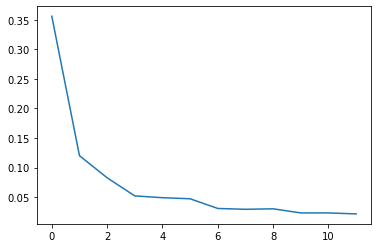

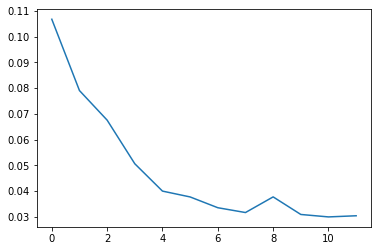

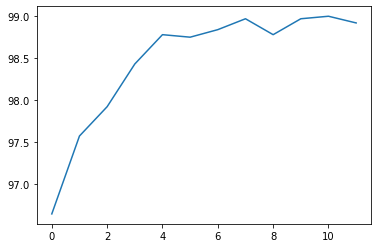

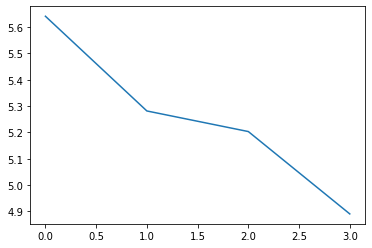

In [7]:
plt.plot(leStats[0])
plt.show()
plt.plot(leStats[1])
plt.show()
plt.plot(leStats[2])
plt.show()
plt.plot(leStats[3])
plt.show()

In [8]:
from Models import LeASLNet

input_shape = (batch_size, 1, 28, 28)

LeASLNN = LeASLNet(input_shape, 10, 1, device)

summary(LeASLNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeASLNet                                 [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─CSC_block: 2-5                    [100, 16, 14, 14]         --
│    │    └─Sequential: 3-1              --                        178
│    └─Tanh: 2-6                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-7                    [100, 16, 7, 7]           --
│    └─Flatten: 2-8                      [100, 784]                --
│    └─Linear: 2-9                       [100, 120]                94,200
│    └─Tanh: 2-10                        [100, 120]                --
│    └─Li

In [9]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeASLNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

In [10]:
leASLStats = train_NN(LeASLNN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.468
test_loss: 0.141, test_accuracy: 95.77
[1,   400] train_loss: 0.124
test_loss: 0.083, test_accuracy: 97.36
[1,   600] train_loss: 0.106
test_loss: 0.078, test_accuracy: 97.57
[2,   200] train_loss: 0.060
test_loss: 0.061, test_accuracy: 98.09
[2,   400] train_loss: 0.054
test_loss: 0.050, test_accuracy: 98.39
[2,   600] train_loss: 0.057
test_loss: 0.046, test_accuracy: 98.5
[3,   200] train_loss: 0.040
test_loss: 0.039, test_accuracy: 98.83
[3,   400] train_loss: 0.033
test_loss: 0.040, test_accuracy: 98.72
[3,   600] train_loss: 0.040
test_loss: 0.039, test_accuracy: 98.71
[4,   200] train_loss: 0.031
test_loss: 0.036, test_accuracy: 98.73
[4,   400] train_loss: 0.028
test_loss: 0.037, test_accuracy: 98.67
[4,   600] train_loss: 0.030
test_loss: 0.035, test_accuracy: 98.79


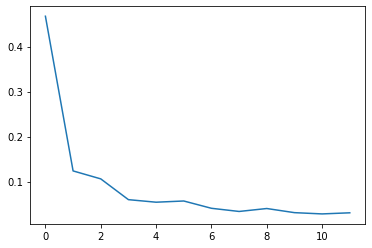

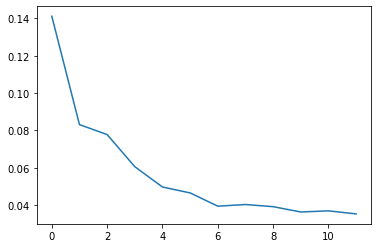

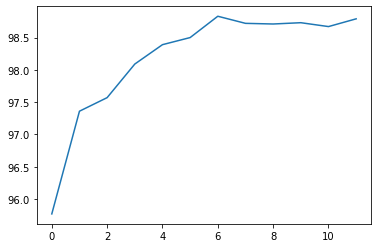

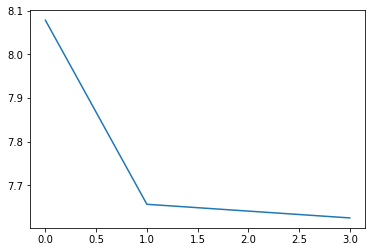

In [11]:
plt.plot(leASLStats[0])
plt.show()
plt.plot(leASLStats[1])
plt.show()
plt.plot(leASLStats[2])
plt.show()
plt.plot(leASLStats[3])
plt.show()

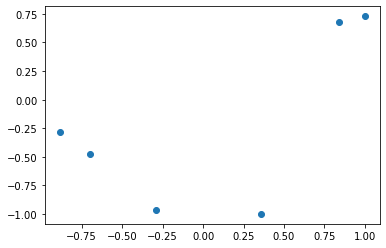

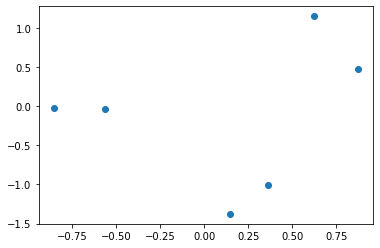

In [12]:
points = LeASLNN.NN[4].NN[3].shifts.detach().to("cpu").numpy()
initial_points = LeASLNN.NN[4].NN[3].initial.detach().to("cpu").numpy()
plt.scatter(initial_points[:, 0], initial_points[:,1])
plt.show()
plt.scatter(points[:, 0], points[:,1])
plt.show()

In [4]:
from Models import LeDepthNet

input_shape = (100, 1, 28, 28)

LeDepthNN = LeDepthNet(input_shape, 10, device)

summary(LeDepthNN, input_shape)

Layer (type:depth-idx)                   Output Shape              Param #
LeDepthNet                               [100, 10]                 --
├─Sequential: 1-1                        --                        --
│    └─Conv2d: 2-1                       [100, 6, 28, 28]          156
│    └─BatchNorm2d: 2-2                  [100, 6, 28, 28]          12
│    └─Tanh: 2-3                         [100, 6, 28, 28]          --
│    └─AvgPool2d: 2-4                    [100, 6, 14, 14]          --
│    └─Depth_wise_block: 2-5             [100, 16, 14, 14]         --
│    │    └─Sequential: 3-1              --                        226
│    └─Tanh: 2-6                         [100, 16, 14, 14]         --
│    └─AvgPool2d: 2-7                    [100, 16, 7, 7]           --
│    └─Flatten: 2-8                      [100, 784]                --
│    └─Linear: 2-9                       [100, 120]                94,200
│    └─Tanh: 2-10                        [100, 120]                --
│    └─Li

In [5]:
criterion = CrossEntropyLoss()
optimizer = optim.SGD(LeDepthNN.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

In [6]:
leDepthStats = train_NN(LeDepthNN, train_dataloader,
        test_dataloader, epochs=4, optimizer=optimizer, criterion=criterion,
        scheduler=scheduler, device=device, steps_to_test=200, print_test=True)

[1,   200] train_loss: 0.479
test_loss: 0.139, test_accuracy: 95.8
[1,   400] train_loss: 0.128
test_loss: 0.090, test_accuracy: 97.2
[1,   600] train_loss: 0.089
test_loss: 0.078, test_accuracy: 97.61
[2,   200] train_loss: 0.051
test_loss: 0.050, test_accuracy: 98.38
[2,   400] train_loss: 0.054
test_loss: 0.051, test_accuracy: 98.39
[2,   600] train_loss: 0.052
test_loss: 0.045, test_accuracy: 98.59
[3,   200] train_loss: 0.032
test_loss: 0.039, test_accuracy: 98.73
[3,   400] train_loss: 0.032
test_loss: 0.040, test_accuracy: 98.66
[3,   600] train_loss: 0.034
test_loss: 0.037, test_accuracy: 98.71
[4,   200] train_loss: 0.025
test_loss: 0.037, test_accuracy: 98.75
[4,   400] train_loss: 0.024
test_loss: 0.035, test_accuracy: 98.76
[4,   600] train_loss: 0.025
test_loss: 0.035, test_accuracy: 98.77


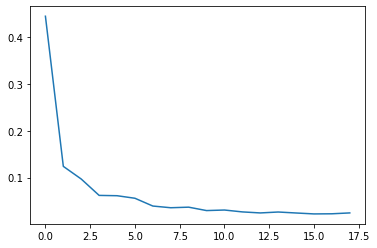

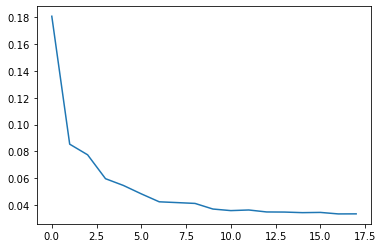

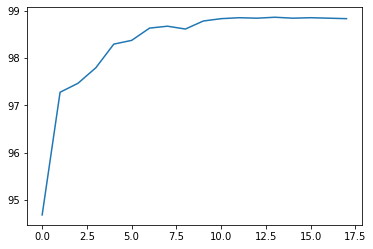

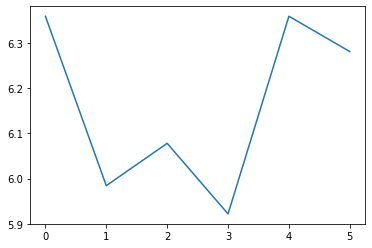

In [16]:
plt.plot(leDepthStats[0])
plt.show()
plt.plot(leDepthStats[1])
plt.show()
plt.plot(leDepthStats[2])
plt.show()
plt.plot(leDepthStats[3])
plt.show()